**Model Selection Considerations**

| Data Assumptions | Assumptions Test |
|------|------|
|   Multivariate Timeseries | N/A|
|   Regular Time Series | domain knowledge/put a groupby on it|


In [7]:
import numpy as np
import pandas as pd
from numpy import sqrt
import matplotlib.pyplot as plt
import timesynth as ts

**Generate some time series data with an anomaly**

In [37]:
def gen_time_series(n):
    time_series = pd.DataFrame([])
    time_sampler = ts.TimeSampler(stop_time=20)
    # Sampling irregular time samples
    irregular_time_samples = time_sampler.sample_irregular_time(num_points=500, keep_percentage=50)
    # Initializing Sinusoidal signal
    sinusoid = ts.signals.Sinusoidal(frequency=0.25)
    # Initializing Gaussian noise
    white_noise = ts.noise.GaussianNoise(std=0.5)
    timeseries = ts.TimeSeries(sinusoid, noise_generator=white_noise)
    outlier_samples, outlier_signals, outlier_errors = timeseries.sample(irregular_time_samples)
    time_series["outlier"] = outlier_samples
    for i in range(n):
        # Initializing Gaussian noise
        white_noise = ts.noise.GaussianNoise(std=0.3)
        # Initializing TimeSeries class with the signal
        timeseries = ts.TimeSeries(sinusoid, noise_generator=white_noise)
        samples, signals, errors = timeseries.sample(irregular_time_samples) 
        time_series[str(i)] = samples
    
    return time_series
        

In [42]:
test = gen_time_series(10)
test.head()
len(test)

250

In [43]:
import datetime
t = pd.date_range(start='1/1/2020', end='05/01/2020', periods=250)
s = pd.Series(t, name = 'TimeStamp')
test.insert(0, 'TimeStamp', s)
test

,TimeStamp,outlier,0,1,2,3,4,5,6,7,8,9
0,2020-01-01 00:00:00.000000000,0.380592,0.119133,-0.294620,-0.304952,0.017525,-0.190917,0.071630,-0.199081,-0.222763,-0.309599,-0.355741
1,2020-01-01 11:39:45.542168576,0.302954,-0.047661,-0.495133,-0.007842,0.437529,-0.024517,0.366612,0.388515,-0.031471,0.050755,0.232617
2,2020-01-01 23:19:31.084337408,0.916132,0.418567,-0.032862,0.313366,0.016801,0.378874,0.212818,0.099176,0.273999,0.648228,0.573548
3,2020-01-02 10:59:16.626505984,1.345665,0.773341,-0.426720,0.049965,-0.402109,-0.110406,0.185066,0.320894,0.962579,0.298321,-0.316260
4,2020-01-02 22:39:02.168674816,0.565177,0.144196,0.575746,0.468513,0.173408,0.459038,0.509941,0.396446,0.337776,0.209489,0.284228
5,2020-01-03 10:18:47.710843392,-0.276173,0.809954,0.166818,0.490397,0.328761,0.313905,1.031106,1.009996,0.438411,1.061453,0.483148
6,2020-01-03 21:58:33.253011968,-0.379199,0.702508,1.033777,1.186329,0.362382,0.596756,0.487627,0.414496,0.938498,0.317248,0.571820
7,2020-01-04 09:38:18.795180800,1.579775,0.524442,0.948850,0.416043,1.232875,0.623129,0.908602,0.815052,1.158010,1.132771,1.395633
8,2020-01-04 21:18:04.337349376,1.458313,0.910226,1.004093,0.820673,0.885091,1.137289,1.094662,1.014211,0.554358,0.334016,1.312256
9,2020-01-05 08:57:49.879517952,1.707848,1.234527,0.922810,1.023764,0.892337,0.466189,0.676078,0.595626,1.198585,1.118647,1.101079


In [44]:
test = test.set_index('TimeStamp')
test.tail()

,outlier,0,1,2,3,4,5,6,7,8,9
TimeStamp,,,,,,,,,,,
2020-04-29 01:20:57.831325184,-0.246661,-0.515241,-0.352432,-0.665728,-0.500463,-0.049964,-0.163953,-0.782099,-0.504620,-0.885061,-0.448463
2020-04-29 13:00:43.373494016,-0.061418,0.453279,-0.475367,-0.502004,-0.102667,0.295536,-0.401072,0.586845,0.133235,0.175915,-0.238025
2020-04-30 00:40:28.915662592,0.480013,-0.178027,-0.125963,0.356268,-0.041144,0.070393,0.292092,0.346466,0.012095,0.560641,-0.547324
2020-04-30 12:20:14.457831424,0.061316,-0.030509,-0.210359,-0.078512,0.300583,0.070656,-0.103320,0.217780,-0.356064,-0.225892,0.104910
2020-05-01 00:00:00.000000000,0.510281,-0.181897,0.315394,-0.006571,0.006632,0.101943,-0.108214,-0.019627,-0.163676,0.016171,0.029444


In [45]:
from influxdb_client import InfluxDBClient
import pandas as pd

In [48]:
token = "8SJzEOHChhFO7kThfyPqcoKyj3HCUkSAmBQuCTyn3oF2WPAzfFFHvDmwO3c8ynX_RzO-_UsrHAwMVw0w21BCtQ=="
bucket = "MAD_Example"
org = "my-org"
client = InfluxDBClient(url="http://localhost:9999", token=token, org=org, debug=False)
from influxdb_client.client.write_api import SYNCHRONOUS
from influxdb_client import InfluxDBClient, Point, WriteOptions

_write_client = client.write_api(write_options=WriteOptions(batch_size=1000, 
                                                            flush_interval=10_000,
                                                            jitter_interval=2_000,
                                                            retry_interval=5_000))
_write_client.write(bucket, record=test, data_frame_measurement_name='example_data',
                    data_frame_tag_columns=[])

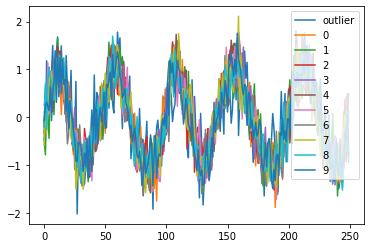

In [14]:
test.plot()

In [80]:
med_abs = test.mad(axis=1, skipna = False)

In [164]:
med_abs_df = pd.DataFrame(med_abs, columns=["med_abs"])
med_abs_df.head()

,med_abs
0,0.258544
1,0.257772
2,0.267551
3,0.274468
4,0.327608


In [165]:
med = test.median(axis=1,skipna = False)

In [166]:
med_df = pd.DataFrame(med, columns=["med"])
med_df.head()

,med
0,0.012410
1,0.202272
2,0.115324
3,0.536183
4,0.503409


In [213]:
score = test.copy()

In [214]:
score = score.sub(med, axis = 0).abs().div(med_abs, axis =0)
score.head()

,outlier,0,1,2,3,4,5,6,7,8,9
0,5.446436,1.954374,1.019742,0.721413,2.599898,0.680892,1.190154,0.765825,1.071659,0.267113,0.853116
1,2.005399,1.558574,0.340575,0.398012,0.358211,0.738561,0.045548,0.288433,0.562686,2.101135,1.480655
2,0.404552,1.445200,0.445625,2.058674,0.092599,0.220479,0.270657,0.047014,1.948920,0.691036,2.298283
3,3.324625,0.071228,0.070308,0.170905,1.138632,0.630750,0.230535,1.622525,1.029748,0.611517,0.988234
4,1.577990,1.001667,0.386970,0.600812,0.902671,1.630062,0.238877,0.116659,0.192998,0.180272,2.232117


In [232]:
binary = score.gt(3)
binary.head()

,outlier,0,1,2,3,4,5,6,7,8,9
0,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [249]:
def mad(data,tolerance):
    med_abs = data.mad(axis=1, skipna = False)
    med = data.median(axis=1,skipna = False)
    score = data.copy()
    score = score.sub(med, axis = 0).abs().div(med_abs, axis =0)
    binary = score.gt(tolerance)
    return binary


In [250]:
mad(test,2.5)

,outlier,0,1,2,3,4,5,6,7,8,9
0,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
245,False,False,False,False,False,False,False,False,False,False,False
246,True,False,False,False,False,False,False,False,False,False,False
247,True,False,False,False,False,False,False,False,False,False,False
248,False,False,False,False,False,True,False,False,False,False,False


Need help. Not sure how to correspond the two DataFrames together element-wise. 